In [4]:
import pandas as pd
import numpy as np
import random
import string

# Функции для генерации данных
def generate_ip():
    return f"{random.randint(0,255)}.{random.randint(0,255)}.{random.randint(0,255)}.{random.randint(0,255)}"

def generate_mac():
    mac = [f"{random.randint(0,255):02x}" for _ in range(6)]
    return ":".join(mac).upper()

def generate_normal_traffic(num_samples=1000):
    protocols = ['HTTP', 'DNS', 'ICMP']
    
    # Создаем словарь для соответствия IP и MAC (нормальное поведение)
    ip_mac_map = {}
    
    data = []
    for _ in range(num_samples):
        protocol = np.random.choice(protocols, p=[0.4, 0.4, 0.2])
        src_ip = generate_ip()
        dst_ip = generate_ip()
        
        # Сохраняем MAC для IP (одинаковый для одного IP)
        if src_ip not in ip_mac_map:
            ip_mac_map[src_ip] = generate_mac()
        src_mac = ip_mac_map[src_ip]
        
        if dst_ip not in ip_mac_map:
            ip_mac_map[dst_ip] = generate_mac()
        dst_mac = ip_mac_map[dst_ip]
        
        packets = random.randint(1, 50)
        time = np.random.uniform(0, 100)
        
        data.append({
            'Protocol': protocol,
            'Source IP': src_ip,
            'Destination IP': dst_ip,
            'Source MAC': src_mac,
            'Destination MAC': dst_mac,
            'Packets': packets,
            'Time': time,
            'Label': 0
        })
    
    return pd.DataFrame(data)

def generate_arp_spoofing_traffic(num_samples=200):
    data = []
    for _ in range(num_samples):
        # Используем ARP протокол
        protocol = 'ARP'
        
        src_ip = generate_ip()
        dst_ip = generate_ip()
        
        # Генерируем случайные MAC-адреса (не соответствующие реальным)
        src_mac = generate_mac()
        dst_mac = generate_mac()
        
        # Создаем аномалию: одинаковые MAC для разных IP
        # Или случайные MAC, не соответствующие реальным устройствам
        if random.random() < 0.5:
            src_mac = dst_mac  # одинаковые MAC
        
        packets = random.randint(50, 200)  # Больше пакетов для атаки
        time = np.random.uniform(0, 100)
        
        data.append({
            'Protocol': protocol,
            'Source IP': src_ip,
            'Destination IP': dst_ip,
            'Source MAC': src_mac,
            'Destination MAC': dst_mac,
            'Packets': packets,
            'Time': time,
            'Label': 1
        })
    
    return pd.DataFrame(data)

# Генерация данных
normal_traffic = generate_normal_traffic(10000)
arp_spoofing_traffic = generate_arp_spoofing_traffic(10000)

# Объединение данных
full_dataset = pd.concat([normal_traffic, arp_spoofing_traffic], ignore_index=True)

# Перемешивание данных
full_dataset = full_dataset.sample(frac=1, random_state=42).reset_index(drop=True)

# Сохранение в CSV
full_dataset.to_csv('network_traffic_dataset.csv', index=False)

print("Датасет успешно сгенерирован и сохранен в network_traffic_dataset.csv")

Датасет успешно сгенерирован и сохранен в network_traffic_dataset.csv


c:\Users\Slyexistence\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 30, 64)         │        17,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 30, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 30, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,265 (122.13 KB)

 Trainable params: 31,073 (121.38 KB)

 Non-trainable params: 192 (768.00 B)

Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.5015 - auc: 0.4984 - loss: 1.7596 - precision_1: 0.5055 - recall_1: 0.7173 - val_accuracy: 0.5009 - val_auc: 0.5159 - val_loss: 1.2186 - val_precision_1: 0.5000 - val_recall_1: 0.0025
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5124 - auc: 0.5080 - loss: 1.1555 - precision_1: 0.5149 - recall_1: 0.5384 - val_accuracy: 0.5034 - val_auc: 0.5108 - val_loss: 0.9798 - val_precision_1: 0.5526 - val_recall_1: 0.0263
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.4991 - auc: 0.4982 - loss: 0.9554 - precision_1: 0.5003 - recall_1: 0.4868 - val_accuracy: 0.5056 - val_auc: 0.4883 - val_loss: 0.8770 - val_precision_1: 0.5497 - val_recall_1: 0.0520
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5025 - auc: 0.5052 - loss: 0.8620 - precision_1: 0.5025 - recall_1: 0.4556 - val_accuracy: 0.5013 - val_auc: 0.5000 - val_loss: 0.8224 - val_precision_1: 0.5005 - val_recall_1: 0.3

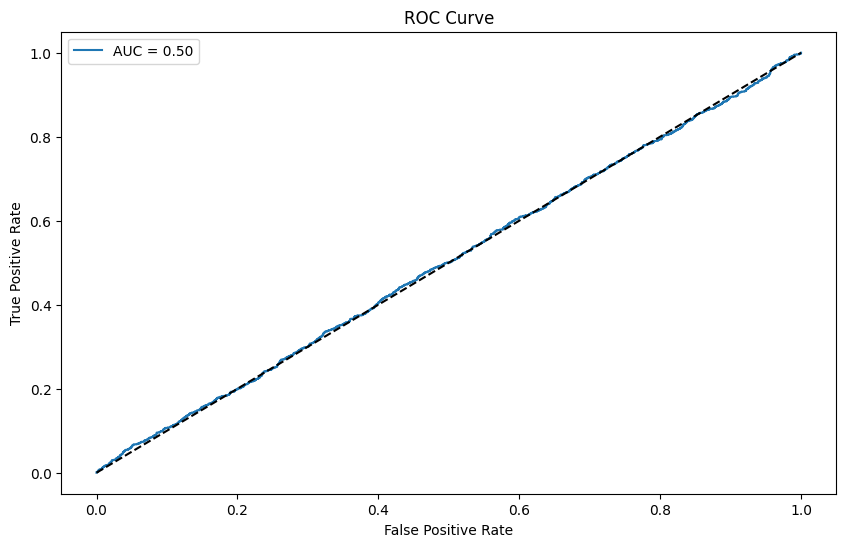

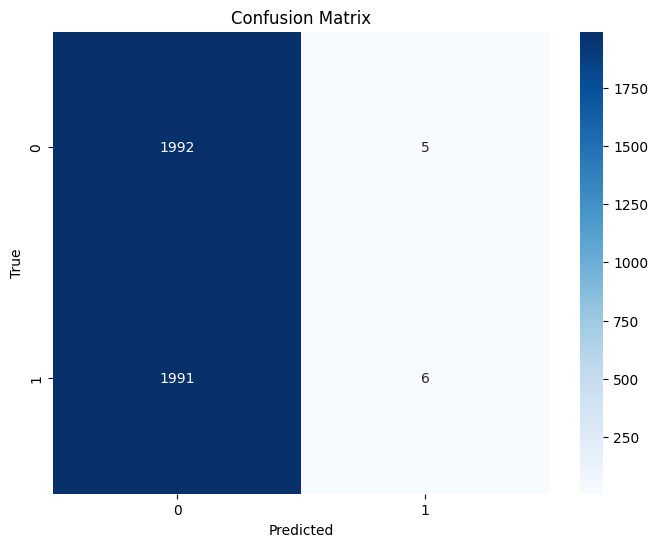

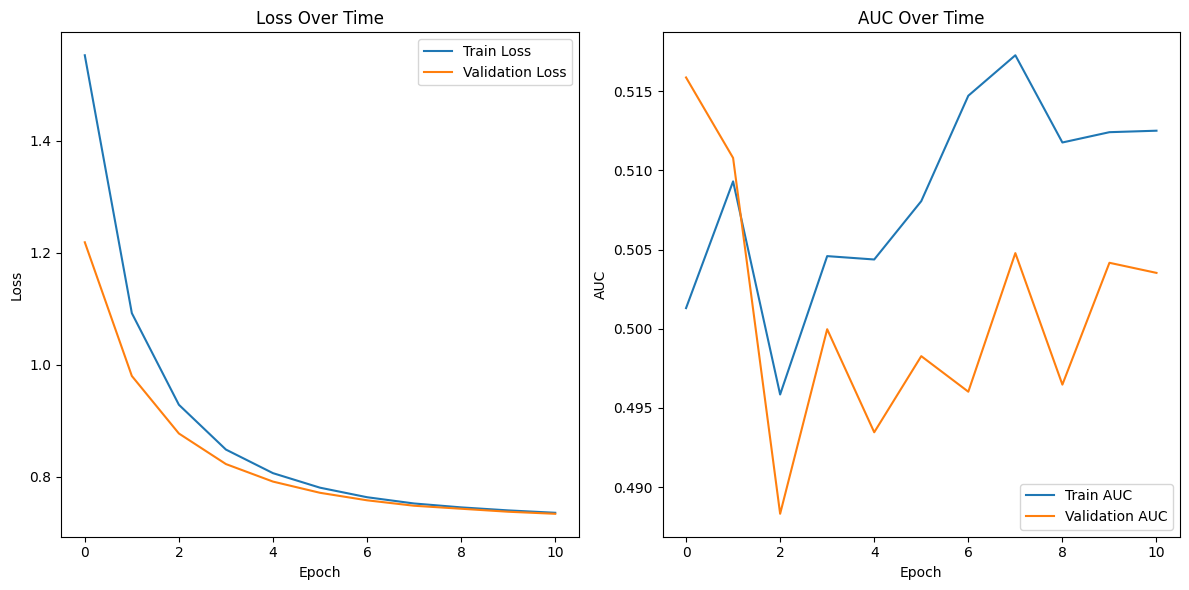

Модель сохранена по пути: D:\Проекты\Дипломаня работа\DoFitN\Code\DoFitN\main\V3\arp_spoofing_detection_model.h5


In [9]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix, roc_curve, auc
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, LSTM, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
import joblib

# Путь к данным и модели
data_path = r'D:\Проекты\Дипломаня работа\DoFitN\Code\DoFitN\main\V3\network_traffic_dataset.csv'
model_dir = r'D:\Проекты\Дипломаня работа\DoFitN\Code\DoFitN\main\V3'

# Загрузка данных
df = pd.read_csv(data_path)
# Удалить столбец: 'Protocol'
df = df.drop(columns=['Protocol'])
# Удалить столбец: 'Packets'
df = df.drop(columns=['Packets'])
# Убедимся, что данные отсортированы по времени для временных окон
df = df.sort_values('Time').reset_index(drop=True)

# Кодирование категориальных переменных
cat_cols = ['Source IP','Destination IP','Source MAC','Destination MAC']
label_encoders = {}

for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Сохранение LabelEncoders
label_encoders_path = os.path.join(model_dir, 'label_encoders.pkl')
joblib.dump(label_encoders, label_encoders_path)

# Нормализация числовых переменных
scaler = StandardScaler()
num_cols = ['Time']
df[num_cols] = scaler.fit_transform(df[num_cols])

# Сохранение Scaler
scaler_path = os.path.join(model_dir, 'scaler.pkl')
joblib.dump(scaler, scaler_path)

# Создание временных окон
def create_sequences(data, window_size):
    X = []
    for i in range(len(data) - window_size):
        X.append(data[i:(i + window_size)])
    return np.array(X)
df
window_size = 30  # Размер временного окна
features = df.drop('label', axis=1).columns.tolist()
X_sequences = create_sequences(df[features].values, window_size)
y_labels = df['label'].values[window_size:]

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X_sequences, 
    y_labels, 
    test_size=0.2, 
    random_state=42,
    stratify=y_labels  # Учет баланса классов
)

# Создание модели LSTM
def create_model(input_shape):
    model = Sequential([
        LSTM(
            64, 
            input_shape=input_shape, 
            return_sequences=True,
            kernel_regularizer=l2(0.01)  # Регуляризация для LSTM
        ),
        BatchNormalization(),
        Dropout(0.3),
        LSTM(
            32, 
            return_sequences=False,
            kernel_regularizer=l2(0.01)
        ),
        BatchNormalization(),
        Dropout(0.3),
        Dense(
            16, 
            activation='relu', 
            kernel_regularizer=l2(0.01)
        ),
        Dense(1, activation='sigmoid')
    ])
    
    # Компиляция модели
    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='binary_crossentropy',
        metrics=[
            'accuracy',
            tf.keras.metrics.AUC(name='auc'),
            tf.keras.metrics.Precision(),
            tf.keras.metrics.Recall()
        ]
    )
    
    return model

# Создание и компиляция модели
input_shape = (window_size, X_train.shape[2])
model = create_model(input_shape)
model.summary()

# Настройка Early Stopping
early_stop = EarlyStopping(
    monitor='val_auc',
    patience=10,
    mode='max',
    restore_best_weights=True,
    verbose=1
)

# Обучение модели
history = model.fit(
    X_train,
    y_train,
    epochs=50,
    batch_size=128,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

# Оценка модели
y_pred = model.predict(X_test).ravel()
y_pred_class = (y_pred > 0.5).astype(int)

print(f"AUC: {roc_auc_score(y_test, y_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_class):.4f}")

# Визуализация результатов
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_class)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Графики обучения
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Time')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['auc'], label='Train AUC')
plt.plot(history.history['val_auc'], label='Validation AUC')
plt.title('AUC Over Time')
plt.ylabel('AUC')
plt.xlabel('Epoch')
plt.legend()
plt.tight_layout()
plt.show()

# Сохранение модели
model_path = os.path.join(model_dir, 'arp_spoofing_detection_model.h5')
model.save(model_path)
print(f"Модель сохранена по пути: {model_path}")
